In [1]:
from sklearn import metrics

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

In [2]:
dataset = pd.read_excel('a1_FlightFare_Dataset.xlsx')
pd.set_option('display.max_columns', None)

dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10001 non-null  object
 1   Date_of_Journey  10001 non-null  object
 2   Source           10001 non-null  object
 3   Destination      10001 non-null  object
 4   Route            10000 non-null  object
 5   Dep_Time         10001 non-null  object
 6   Arrival_Time     10001 non-null  object
 7   Duration         10001 non-null  object
 8   Total_Stops      10000 non-null  object
 9   Additional_Info  10001 non-null  object
 10  Price            10001 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 859.6+ KB


In [4]:
unseen_dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
dataset.dropna(inplace=True)

In [6]:
dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
dataset['journey_day'] = pd.to_datetime(dataset.Date_of_Journey, format='%d/%m/%Y').dt.day
dataset['journey_month'] = pd.to_datetime(dataset.Date_of_Journey, format='%d/%m/%Y').dt.month
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [9]:
dataset.drop(['Date_of_Journey'], axis=1, inplace=True)

In [10]:
dataset['dep_hour'] = pd.to_datetime(dataset['Dep_Time']).dt.hour
dataset['dep_min'] = pd.to_datetime(dataset['Dep_Time']).dt.minute
dataset.drop(['Dep_Time'], axis=1, inplace=True)

/tmp/ipykernel_24242/289197660.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset['dep_hour'] = pd.to_datetime(dataset['Dep_Time']).dt.hour
/tmp/ipykernel_24242/289197660.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset['dep_min'] = pd.to_datetime(dataset['Dep_Time']).dt.minute


In [11]:
dataset['arrival_hour'] = pd.to_datetime(dataset['Arrival_Time']).dt.hour
dataset['arrival_min'] = pd.to_datetime(dataset['Arrival_Time']).dt.minute
dataset.drop(['Arrival_Time'], axis=1, inplace=True)

/tmp/ipykernel_24242/2198441249.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset['arrival_hour'] = pd.to_datetime(dataset['Arrival_Time']).dt.hour
/tmp/ipykernel_24242/2198441249.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset['arrival_min'] = pd.to_datetime(dataset['Arrival_Time']).dt.minute


In [12]:
dataset.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [13]:
duration = list(dataset['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'
        else:
            duration[i] = '0h ' + duration[i] 

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep='h')[0]))
    duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))

dataset['Duration_hours'] = duration_hours
dataset['Duration_mins'] = duration_mins

dataset.drop(['Duration'], axis=1, inplace=True)

dataset.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [14]:
dataset['Airline'].value_counts()

Airline
Jet Airways                          3598
IndiGo                               1927
Air India                            1633
Multiple carriers                    1129
SpiceJet                              769
Vistara                               447
Air Asia                              296
GoAir                                 179
Multiple carriers Premium economy      13
Jet Airways Business                    5
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [15]:
Airline = dataset[['Airline']]
Current_Airline_List = Airline['Airline']
New_Airline_List = []

for carrier in Current_Airline_List:
    if carrier in ['Jet Airways', 'IndiGo', 'Air India', 'SpiceJet', 'Multiple carriers',
                   'GoAir', 'Vistara', 'Air Asia']:
        New_Airline_List.append(carrier)
    else:
        New_Airline_List.append('Other')        

Airline['Airline'] = pd.DataFrame(New_Airline_List)
Airline['Airline'].value_counts()

/tmp/ipykernel_24242/3086251695.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline'] = pd.DataFrame(New_Airline_List)


Airline
Jet Airways          3598
IndiGo               1927
Air India            1632
Multiple carriers    1129
SpiceJet              769
Vistara               447
Air Asia              296
GoAir                 179
Other                  22
Name: count, dtype: int64

In [16]:
Airline = pd.get_dummies(Airline, drop_first=True, dtype=int)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara
0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [17]:
dataset['Source'].value_counts()

Source
Delhi       4257
Kolkata     2678
Banglore    2058
Mumbai       647
Chennai      360
Name: count, dtype: int64

In [18]:
Source = dataset[['Source']]
Source = pd.get_dummies(Source, drop_first=True, dtype=int)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [19]:
dataset['Destination'].value_counts()

Destination
Cochin       4257
Banglore     2678
Delhi        1191
New Delhi     867
Hyderabad     647
Kolkata       360
Name: count, dtype: int64

In [20]:
Destination = dataset[['Destination']]
Current_Destination_List = Destination['Destination']
New_Destination_List = []

for value in Current_Destination_List:
    if value in ['New Delhi']:
        New_Destination_List.append('Delhi')
    else:
        New_Destination_List.append(value)

Destination['Destination'] = pd.DataFrame(New_Destination_List)
Destination = pd.get_dummies(Destination, drop_first=True, dtype=int)

Destination.head()

/tmp/ipykernel_24242/2711348153.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Destination['Destination'] = pd.DataFrame(New_Destination_List)


,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


In [21]:
dataset.drop(['Route', 'Additional_Info'], axis=1, inplace=True)

In [22]:
dataset['Total_Stops'].value_counts()

Total_Stops
1 stop      5281
non-stop    3259
2 stops     1415
3 stops       44
4 stops        1
Name: count, dtype: int64

In [23]:
dataset.replace({'non-stop':0, '1 stop':1, '2 stops': 2, '3 stops': 3, '4 stops': 4}, inplace=True)
dataset.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [24]:
data_train = pd.concat([dataset, Airline, Source, Destination], axis=1)
data_train.drop(['Airline', 'Destination', 'Source'], axis=1, inplace=True)

In [25]:
data_train.shape

(10000, 26)

In [26]:
data_train.head()

,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [27]:
X = data_train.loc[:, ['Total_Stops', 'journey_day', 'journey_month', 'dep_hour',
                       'dep_min', 'arrival_hour', 'arrival_min', 'Duration_hours',
                       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
                       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Other',
                       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai', 'Source_Delhi',
                       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
                       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata']]

y = data_train.iloc[:, 1]

In [28]:
X.shape, y.shape

((10000, 25), (10000,))

In [29]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)
print(selection.feature_importances_)

[0.22881724 0.14210473 0.06393404 0.03062769 0.02359414 0.0344112
 0.02403496 0.14081779 0.01997453 0.00987415 0.00134948 0.01136179
 0.11970566 0.01780646 0.02710779 0.00381283 0.00335898 0.00136836
 0.02844177 0.01043992 0.01623753 0.00708244 0.02824724 0.00377087
 0.00171842]


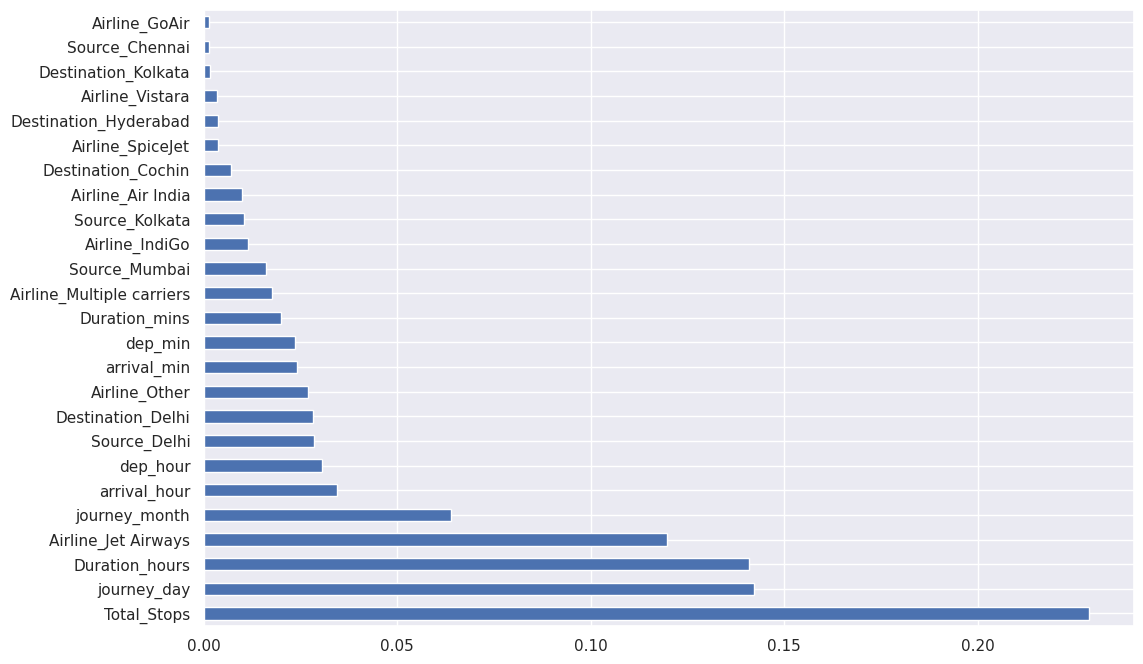

In [30]:
plt.figure(figsize=(12,8))
feat_importance = pd.Series(selection.feature_importances_, index=X.columns)
feat_importance.nlargest(25).plot(kind='barh')
plt.show()

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(z):
    vif = pd.DataFrame()
    vif['variable'] = z.columns
    vif['VIF'] = [variance_inflation_factor(z.values, i) for i in range(z.shape[1])]
    return (vif)

In [35]:
calc_vif(X)

,variable,VIF
0,Total_Stops,7.533035
1,journey_day,3.511805
2,journey_month,16.470796
3,dep_hour,5.790951
4,dep_min,2.804206
5,arrival_hour,4.923106
6,arrival_min,3.455823
7,Duration_hours,6.183394
8,Duration_mins,4.106901
9,Airline_Air India,5.381726


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [38]:
print('Model Performance on Training Set:', round(rf_reg.score(X_train, y_train)*100, 2))
print('Model Performance on Test Set:', round(rf_reg.score(X_test, y_test)*100, 2))

Model Performance on Training Set: 95.38
Model Performance on Test Set: 82.96


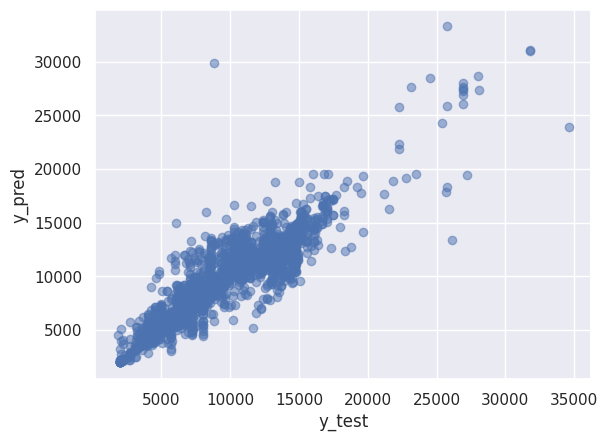

In [39]:
y_pred = rf_reg.predict(X_test)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [40]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Normalized RMSE: ', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/(max(y_test)-min(y_test)),2))
print('Max Value: ', max(y), '\nMin Value: ', min(y))

MAE: 1177.0847603593072
MSE: 3385025.4339098185
RMSE: 1839.8438612854675
Normalized RMSE:  0.06
Max Value:  79512 
Min Value:  1759


In [41]:
import pickle
file = open('rf_flight.pkl', 'wb')
pickle.dump(rf_reg, file)

In [42]:
import pickle
path = 'rf_flight.pkl'
model = open(path, 'rb')
rf_model = pickle.load(model)

In [43]:
unseen_dataset = pd.read_excel('a2_Unseen_Dataset.xlsx')
unseen_dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,27/05/2019,Delhi,Cochin,DEL → BOM → COK,07:05,19:00,11h 55m,1 stop,In-flight meal not included,12898
1,IndiGo,6/03/2019,Delhi,Cochin,DEL → MAA → COK,02:05,07:25,5h 20m,1 stop,No info,10851
2,Air India,21/03/2019,Delhi,Cochin,DEL → BLR → COK,09:45,23:00,13h 15m,1 stop,No info,5704
3,Vistara,18/03/2019,Banglore,New Delhi,BLR → DEL,21:10,00:05 16 Mar,2h 55m,non-stop,No info,11598
4,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,08:30,19:15,10h 45m,1 stop,No info,9149


In [45]:
unseen_dataset['journey_day'] = pd.to_datetime(unseen_dataset.Date_of_Journey, format='%d/%m/%Y').dt.day
unseen_dataset['journey_month'] = pd.to_datetime(unseen_dataset.Date_of_Journey, format='%d/%m/%Y').dt.month
unseen_dataset.drop(['Date_of_Journey'], axis=1, inplace=True)

unseen_dataset['dep_hour'] = pd.to_datetime(unseen_dataset['Dep_Time']).dt.hour
unseen_dataset['dep_min'] = pd.to_datetime(unseen_dataset['Dep_Time']).dt.minute
unseen_dataset.drop(['Dep_Time'], axis=1, inplace=True)

unseen_dataset['arrival_hour'] = pd.to_datetime(unseen_dataset['Arrival_Time']).dt.hour
unseen_dataset['arrival_min'] = pd.to_datetime(unseen_dataset['Arrival_Time']).dt.minute
unseen_dataset.drop(['Arrival_Time'], axis=1, inplace=True)

duration = list(unseen_dataset['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'
        else:
            duration[i] = '0h ' + duration[i] 

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep='h')[0]))
    duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))

unseen_dataset['Duration_hours'] = duration_hours
unseen_dataset['Duration_mins'] = duration_mins

unseen_dataset.drop(['Duration'], axis=1, inplace=True)


Airline = unseen_dataset[['Airline']]
Current_Airline_List = Airline['Airline']
New_Airline_List = []

for carrier in Current_Airline_List:
    if carrier in ['Jet Airways', 'IndiGo', 'Air India', 'SpiceJet', 'Multiple carriers',
                   'GoAir', 'Vistara', 'Air Asia']:
        New_Airline_List.append(carrier)
    else:
        New_Airline_List.append('Other')        

Airline['Airline'] = pd.DataFrame(New_Airline_List)
Airline = pd.get_dummies(Airline, drop_first=True, dtype=int)

Source = unseen_dataset[['Source']]
Source = pd.get_dummies(Source, drop_first=True, dtype=int)

Destination = unseen_dataset[['Destination']]
Current_Destination_List = Destination['Destination']
New_Destination_List = []

for value in Current_Destination_List:
    if value in ['New Delhi']:
        New_Destination_List.append('Delhi')
    else:
        New_Destination_List.append(value)

Destination['Destination'] = pd.DataFrame(New_Destination_List)
Destination = pd.get_dummies(Destination, drop_first=True, dtype=int)

unseen_dataset.drop(['Route', 'Additional_Info'], axis=1, inplace=True)
unseen_dataset.replace({'non-stop':0, '1 stop':1, '2 stops': 2, '3 stops': 3, '4 stops': 4}, inplace=True)


/tmp/ipykernel_24242/1656051837.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  unseen_dataset['dep_hour'] = pd.to_datetime(unseen_dataset['Dep_Time']).dt.hour
/tmp/ipykernel_24242/1656051837.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  unseen_dataset['dep_min'] = pd.to_datetime(unseen_dataset['Dep_Time']).dt.minute
/tmp/ipykernel_24242/1656051837.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  unseen_dataset['arrival_hour'] = pd.to_datetime(unseen_dataset['Arrival_Time']).dt.hour
/tmp/ipykernel_24242/1656051837.py:10: UserWarning: Could not infer format, so 

In [46]:
data_test = pd.concat([unseen_dataset, Airline, Source, Destination], axis=1)
data_test.drop(['Airline', 'Destination', 'Source'], axis=1, inplace=True)

In [47]:
data_test.head()

,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,1,12898,27,5,7,5,19,0,11,55,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1,1,10851,6,3,2,5,7,25,5,20,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
2,1,5704,21,3,9,45,23,0,13,15,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,0,11598,18,3,21,10,0,5,2,55,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,1,9149,27,5,8,30,19,15,10,45,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0


In [49]:
X_unseen = data_test.loc[:, ['Total_Stops', 'journey_day', 'journey_month', 'dep_hour',
                       'dep_min', 'arrival_hour', 'arrival_min', 'Duration_hours',
                       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
                       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Other',
                       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai', 'Source_Delhi',
                       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
                       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata']]

y_unseen = data_test.iloc[:, 1]

In [54]:
y_pred = rf_model.predict(X_unseen)

In [55]:
y_pred.shape, y_unseen.shape

((682,), (682,))

In [56]:
print('MAE:', metrics.mean_absolute_error(y_unseen, y_pred))
print('MSE:', metrics.mean_squared_error(y_unseen, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_unseen, y_pred)))
print('Normalized RMSE: ', round(np.sqrt(metrics.mean_squared_error(y_unseen, y_pred))/(max(y_unseen)-min(y_unseen)),2))
print('Max Value: ', max(y_unseen), '\nMin Value: ', min(y_unseen))

MAE: 1293.2146911897569
MSE: 8054403.9430029215
RMSE: 2838.0281786837354
Normalized RMSE:  0.05
Max Value:  57209 
Min Value:  1759


In [58]:
df_y_pred = pd.DataFrame(y_pred, columns=['Predicted Price'])
original_dataset = pd.read_excel('./a2_Unseen_Dataset.xlsx')
dfx = pd.concat([original_dataset, df_y_pred], axis=1)
dfx.to_excel('ModeulOutput.xlsx')
dfx.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Predicted Price
0,Jet Airways,27/05/2019,Delhi,Cochin,DEL → BOM → COK,07:05,19:00,11h 55m,1 stop,In-flight meal not included,12898,15548.116667
1,IndiGo,6/03/2019,Delhi,Cochin,DEL → MAA → COK,02:05,07:25,5h 20m,1 stop,No info,10851,11456.250000
2,Air India,21/03/2019,Delhi,Cochin,DEL → BLR → COK,09:45,23:00,13h 15m,1 stop,No info,5704,6651.416667
3,Vistara,18/03/2019,Banglore,New Delhi,BLR → DEL,21:10,00:05 16 Mar,2h 55m,non-stop,No info,11598,6028.901667
4,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,08:30,19:15,10h 45m,1 stop,No info,9149,9134.057667
